In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import find_peaks
import time
import sounddevice as sd
import noisereduce as nr

from spectrogram import Spectogram

/home/jakovac/Work/Mikrofonok/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
spect = Spectogram(linewidth=2, time_step=0.01)

In [3]:
trange = np.arange(0,3,spect.sampling_dt)
O = 440 #Hz
spect.set(np.cos(2*np.pi*O*trange))#.play()

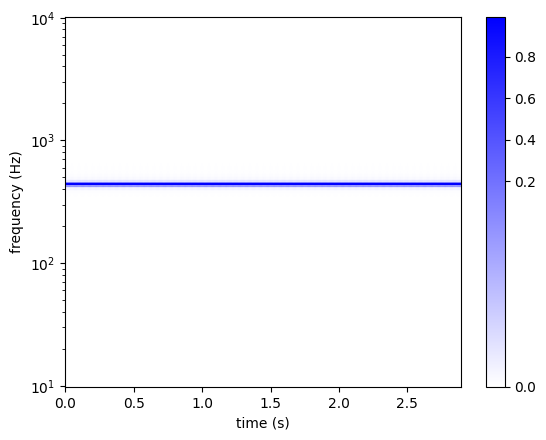

In [4]:
fig, ax = plt.subplots()
mesh = spect.show_spectrogram(ax=ax)
fig.colorbar(mesh, ax=ax)
plt.show()

maximum = 439.75 Hz


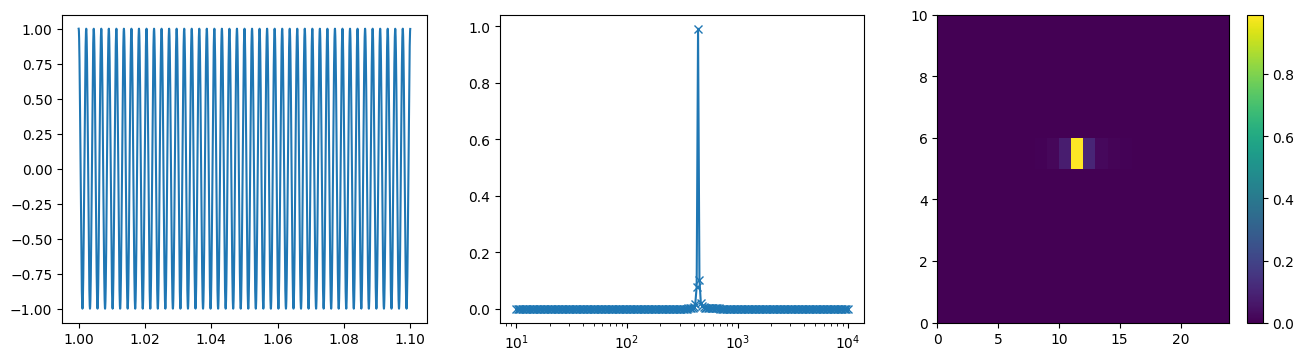

In [5]:
t = 1 #sec
kmax, numax, vmax = spect.find_maxima_in_spectrum(t)[0]
print(f'maximum = {numax:.2f} Hz')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
sample = spect.data_slice(t, t+spect.tint)
times = np.linspace(t, t+spect.tint,len(sample))
ax[0].plot(times, sample)
spect.plot_spectrum(t, ax=ax[1], marker='x')
mesh = spect.plot_octaves_2D(t, ax=ax[2], cmap='viridis')
fig.colorbar(mesh, ax=ax[2])
plt.show()

In [6]:
data, sample_rate = sf.read("output_audio.wav")
data = np.sum(data, axis=1)
data.shape

(3048448,)

In [7]:
spect.set(data)

<Axes: >

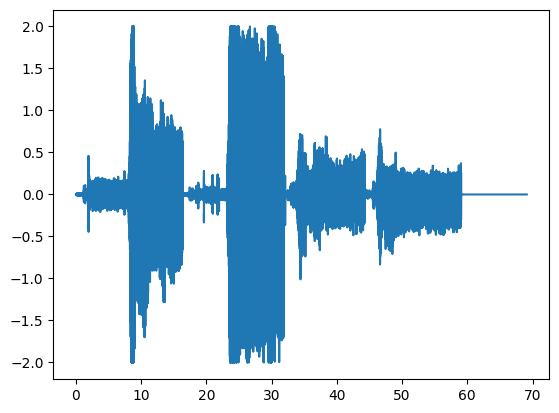

In [8]:
spect.plot_data()

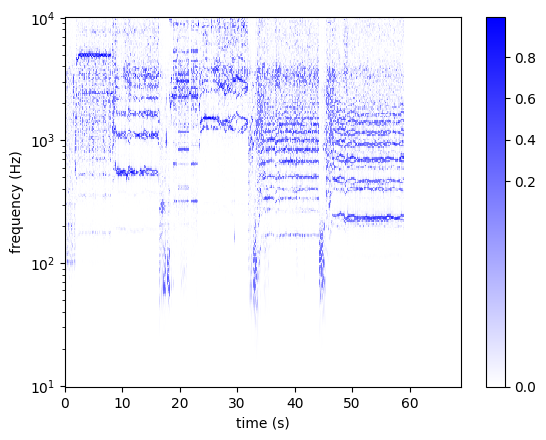

In [9]:
fig, ax = plt.subplots()
mesh = spect.show_spectrogram(ax=ax)
fig.colorbar(mesh, ax=ax)
plt.show()

maximum = 3257.40 Hz


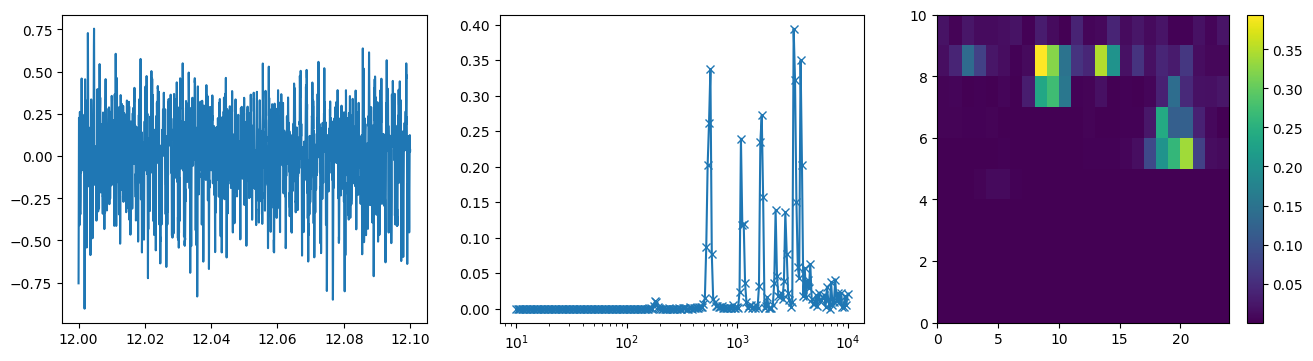

In [10]:
t = 12 #sec
kmax, numax, vmax = spect.find_maxima_in_spectrum(t)[0]
print(f'maximum = {numax:.2f} Hz')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
sample = spect.data_slice(t, t+spect.tint)
times = np.linspace(t, t+spect.tint,len(sample))
ax[0].plot(times, sample)
spect.plot_spectrum(t, ax=ax[1], marker='x')
mesh = spect.plot_octaves_2D(t, ax=ax[2], cmap='viridis')
fig.colorbar(mesh, ax=ax[2])
plt.show()

<Axes: >

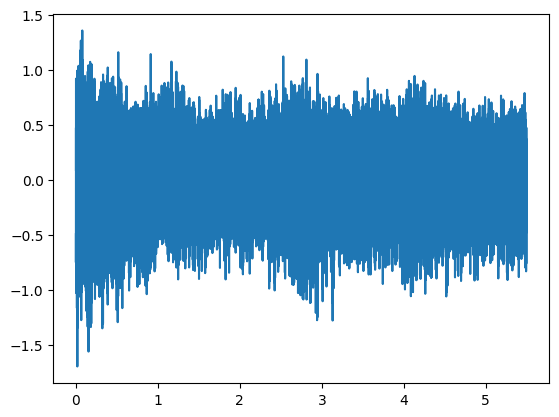

In [11]:
sample =spect.data_slice(10.5,16, data)
spect.set(sample)
spect.plot_data()

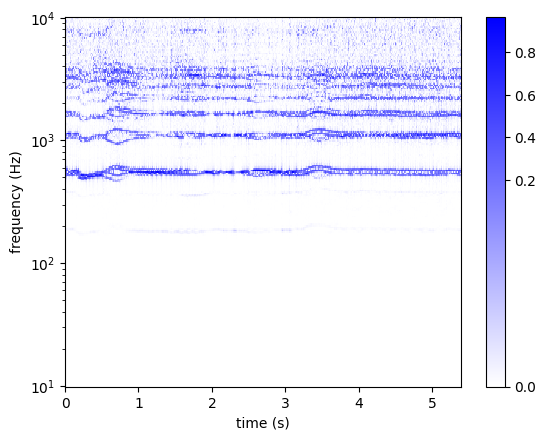

In [12]:
fig, ax = plt.subplots()
mesh = spect.show_spectrogram(ax=ax)
fig.colorbar(mesh, ax=ax)
plt.show()

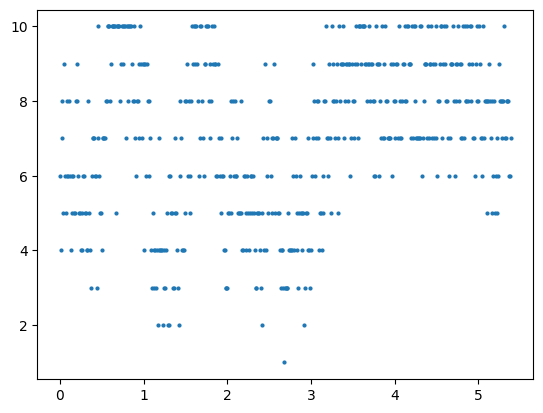

In [13]:
threshold = 0.1
times, peaks = spect.find_maxima_in_spectrogram(threshold=threshold)
plt.plot(times, [len(v) for v in peaks], 'o', ms=2)

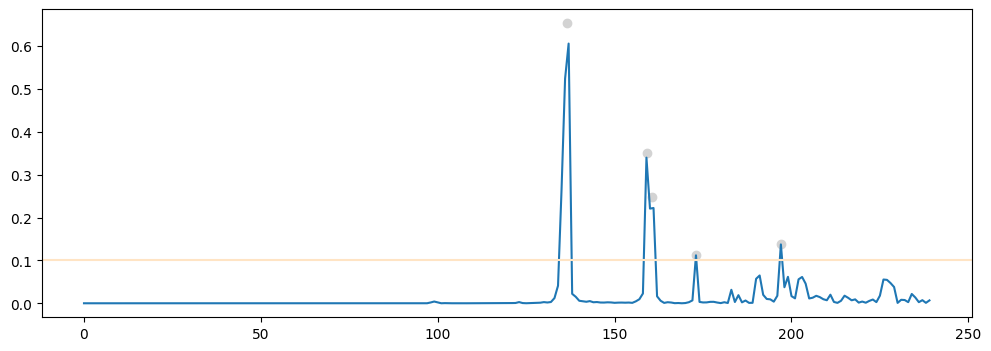

In [14]:
t = 0.3
n = spect.time_to_index(1/spect.timestep, t)
fig,ax = plt.subplots(ncols=1, figsize=(12,4) )
ax.plot(spect.spectrum_data[n])
ax.axhline(threshold,color='bisque')
for pos, freq, height in peaks[n]:
    ax.scatter(pos, height, color='lightgrey')

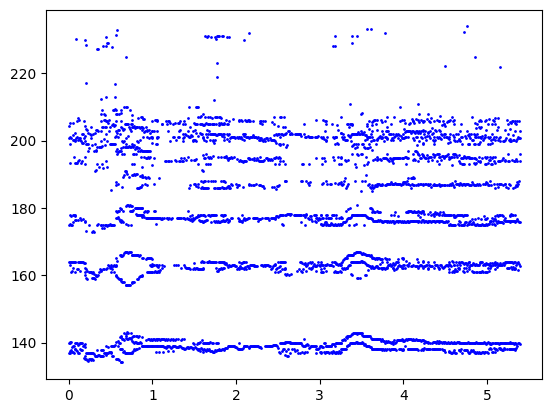

In [15]:
for i,p in enumerate(peaks):
    if len(p)==0:
        continue
    t = times[i]
    plt.plot(t*np.ones(shape=p.shape[0]), p[:,0], 'o', color='blue', ms=1)
    #plt.xlim(3,4)

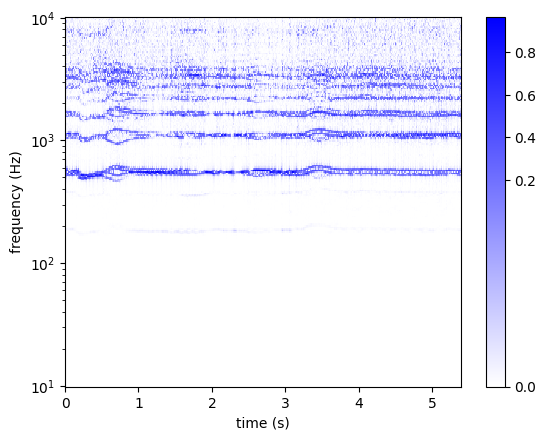

In [16]:
fig, ax = plt.subplots()
mesh = spect.show_spectrogram(ax=ax)
fig.colorbar(mesh, ax=ax)
plt.show()

In [38]:
trackers = []
tolerance = 3
quit = False
for pi,p in enumerate(peaks):
    actual_time = times[pi]
    for logpos in p[:,0]:
        foundtrack = []
        for tri,trdata in enumerate(trackers):
            if (logpos-trdata[-1][1])**2 < tolerance**2:
                foundtrack.append(tri)
        print('..................')
        print(logpos, foundtrack)
        if not foundtrack:
            trackers.append([[actual_time, logpos]])
            continue
        if len(foundtrack) >1:
            foundtrack = sorted(foundtrack, key=lambda ft: trackers[ft][-1][0])
            print(f'---------->{logpos},{foundtrack}->{[ trackers[ft][-1] for ft in foundtrack]}->{trackers[foundtrack[-1]]}', flush=True)
            quit=True
        trackers[foundtrack[-1]].append([actual_time, logpos])
        if quit:
            break
    if quit:
        break
trackers


..................
139.7993875161903 []
..................
164.0788104580133 []
..................
137.06202780307123 [0]
..................
204.2460894196444 []
..................
175.0097551141165 []
..................
200.75404816911885 []
..................
139.83485983898976 [0]
..................
136.99684674231958 [0]
..................
163.07059924651597 [1]
..................
205.22760410713843 [2]
..................
140.07397267534864 []
..................
201.1601834616485 [4]
..................
137.63978172685688 [0, 5]
---------->137.63978172685688,[0, 5]->[[0.01, np.float64(136.99684674231958)], [0.02, np.float64(140.07397267534864)]]->[[0.02, np.float64(140.07397267534864)]]


[[[0.0, np.float64(139.7993875161903)],
  [0.0, np.float64(137.06202780307123)],
  [0.01, np.float64(139.83485983898976)],
  [0.01, np.float64(136.99684674231958)]],
 [[0.0, np.float64(164.0788104580133)],
  [0.01, np.float64(163.07059924651597)]],
 [[0.0, np.float64(204.2460894196444)],
  [0.01, np.float64(205.22760410713843)]],
 [[0.0, np.float64(175.0097551141165)]],
 [[0.0, np.float64(200.75404816911885)],
  [0.02, np.float64(201.1601834616485)]],
 [[0.02, np.float64(140.07397267534864)],
  [0.02, np.float64(137.63978172685688)]]]

In [24]:
trackers[0]

[[0.0, np.float64(139.7993875161903)],
 [0.0, np.float64(137.06202780307123)],
 [0.01, np.float64(139.83485983898976)],
 [0.01, np.float64(136.99684674231958)],
 [0.18, np.float64(135.2921415446354)],
 [0.19, np.float64(135.89172830852078)],
 [0.2, np.float64(135.28134350247052)],
 [0.21, np.float64(135.100877684904)],
 [0.21, np.float64(136.85741618122148)],
 [0.22, np.float64(137.00839893271717)],
 [0.22, np.float64(134.97335539229604)],
 [0.23, np.float64(137.03054829029105)],
 [0.23, np.float64(134.481952200458)],
 [0.24, np.float64(136.9191733375746)],
 [0.24, np.float64(135.11915976709543)],
 [0.25, np.float64(136.92907797898755)],
 [0.25, np.float64(135.05407670701553)],
 [0.26, np.float64(136.97295092509592)],
 [0.26, np.float64(134.97363947537696)],
 [0.27, np.float64(136.83533996315683)],
 [0.27, np.float64(135.16970635670683)],
 [0.28, np.float64(135.03686427656612)],
 [0.28, np.float64(136.9434408773046)],
 [0.29, np.float64(136.99774301993745)],
 [0.29, np.float64(134.9725

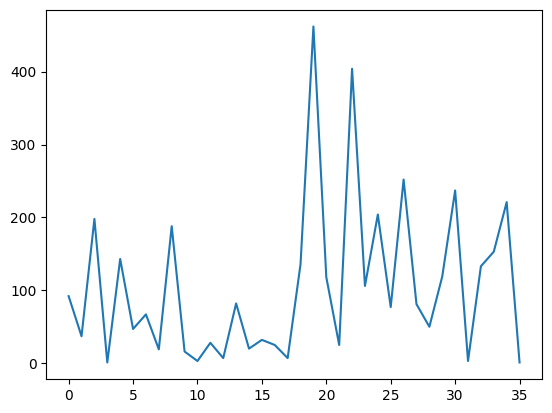

In [23]:
plt.plot([len(tr) for tr in trackers])

(130.0, 150.0)

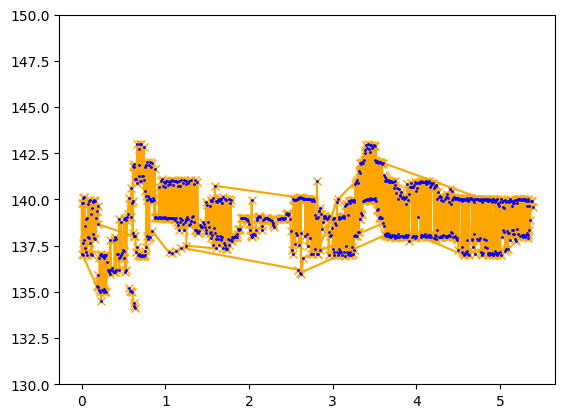

In [19]:
for tr in trackers:
    plt.plot(*np.array(tr).T, 'x-', c='orange')
for i,p in enumerate(peaks):
    if len(p)==0:
        continue
    t = times[i]
    plt.plot(t*np.ones(shape=p.shape[0]), p[:,0], 'o', color='blue', ms=1)
plt.ylim(130,150)


In [20]:
for tr in trackers:
    print(tr[-1])

[0.8, np.float64(137.98498074076062)]
[0.97, np.float64(161.02222639418358)]
[5.38, np.float64(205.97983900971155)]
[0.0, np.float64(175.0097551141165)]
[5.39, np.float64(203.00134584565592)]
[0.76, np.float64(137.22909411783868)]
[4.17, np.float64(178.97104586503022)]
[0.46, np.float64(192.1021884761289)]
[4.58, np.float64(164.26292127527677)]
[5.16, np.float64(222.0259032523668)]
[1.77, np.float64(218.9720882514931)]
[1.6, np.float64(207.8971881745256)]
[4.17, np.float64(210.88033530917306)]
[1.71, np.float64(206.80185673179517)]
[1.5, np.float64(205.17589229530589)]
[1.08, np.float64(188.98133456461443)]
[4.76, np.float64(233.9212110558821)]
[0.64, np.float64(134.10795591598327)]
[3.6, np.float64(180.06146805172492)]
[5.39, np.float64(175.93421843391232)]
[4.99, np.float64(206.25189372992926)]
[4.63, np.float64(136.98749378408903)]
[5.01, np.float64(136.98184172309013)]
[3.5500000000000003, np.float64(189.92568799173833)]
[5.39, np.float64(196.10679637651606)]
[4.01, np.float64(206.

In [21]:
tolerance=3
trackers = [ [[0, int(u), float(v)]] for u,_,v in peaks[0]]
for timeindex, p in enumerate(peaks[1:]):
    for u,_,v in p:
        newitem = [timeindex+1, int(u), float(v)]
        foundtracker = False
        for i,tr in enumerate(trackers):
            if np.abs(tr[-1][1]-u)<tolerance:
                foundtracker=True
                trackers[i].append(newitem)
        if not foundtracker:
            trackers.append([newitem])
len(trackers)


333